In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# import plotly modules
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

import warnings
warnings.filterwarnings('ignore')


import nltk
nltk.download()
#nltk.download('punkt')
#nltk.download('stopwords')
from nltk import word_tokenize, sent_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


In [3]:
hotel_review = pd.read_csv('hotelreview.csv', low_memory=False)

In [4]:
hotel_review.shape

(35912, 19)

In [5]:
hotel_review.head()

address categories      city country   latitude  longitude  \
0  Riviera San Nicol 11/a     Hotels  Mableton      US  45.421611  12.376187   
1  Riviera San Nicol 11/a     Hotels  Mableton      US  45.421611  12.376187   
2  Riviera San Nicol 11/a     Hotels  Mableton      US  45.421611  12.376187   
3  Riviera San Nicol 11/a     Hotels  Mableton      US  45.421611  12.376187   
4  Riviera San Nicol 11/a     Hotels  Mableton      US  45.421611  12.376187   

                 name postalCode province          reviews.date  \
0  Hotel Russo Palace      30126       GA  2013-09-22T00:00:00Z   
1  Hotel Russo Palace      30126       GA  2015-04-03T00:00:00Z   
2  Hotel Russo Palace      30126       GA  2014-05-13T00:00:00Z   
3  Hotel Russo Palace      30126       GA  2013-10-27T00:00:00Z   
4  Hotel Russo Palace      30126       GA  2015-03-05T00:00:00Z   

      reviews.dateAdded  reviews.doRecommend  reviews.id  reviews.rating  \
0  2016-10-24T00:00:25Z                  NaN         NaN             4.0   
1  2016-10-24T00:00:25Z                  NaN         NaN             5.0   
2  2016-10-24T00:00:25Z                  NaN         NaN             5.0   
3  2016-10-24T00:00:25Z                  NaN         NaN             5.0   
4  2016-10-24T00:00:25Z                  NaN         NaN             5.0   

                                        reviews.text  \
0  Pleasant 10 min walk along the sea front to th...   
1  Really lovely hotel. Stayed on the very top fl...   
2  Ett mycket bra hotell. Det som drog ner betyge...   
3  We stayed here for four nights in October. The...   
4  We stayed here for four nights in October. The...   

                        reviews.title reviews.userCity reviews.username  \
0  Good location away from the crouds              NaN      Russ (kent)   
1      Great hotel with Jacuzzi bath!              NaN       A Traveler   
2                         Lugnt l��ge              NaN             Maud   
3          Good location on the Lido.              NaN            Julie   
4              ������ ���������������              NaN         sungchul   

  reviews.userProvince  
0                  NaN  
1                  NaN  
2                  NaN  
3                  NaN  
4                  NaN

In [6]:
eighty_count = len(hotel_review)*4 / 5

In [7]:
hotel_review1 = hotel_review.dropna(thresh=eighty_count,axis=1)

In [8]:
hotel_review1.shape

(35912, 15)

In [9]:
object_columns_df = hotel_review1.select_dtypes(include=['object'])
print(object_columns_df.iloc[0])

cols = ['country']
for name in cols:
    print(name,':')
    print(object_columns_df[name].value_counts(),'\n')

address                                         Riviera San Nicol 11/a
categories                                                      Hotels
city                                                          Mableton
country                                                             US
name                                                Hotel Russo Palace
postalCode                                                       30126
province                                                            GA
reviews.date                                      2013-09-22T00:00:00Z
reviews.dateAdded                                 2016-10-24T00:00:25Z
reviews.text         Pleasant 10 min walk along the sea front to th...
reviews.title                       Good location away from the crouds
reviews.username                                           Russ (kent)
Name: 0, dtype: object
country :
US    35912
Name: country, dtype: int64 



In [10]:
old_names = ['reviews.date', 'reviews.rating', 'reviews.title', 'reviews.text'] 
new_names = ['date', 'rating', 'title', 'text']
hotel_review2 = hotel_review1.rename(columns=dict(list(zip(old_names, new_names)), inplace=True))

In [11]:
df = hotel_review2[['latitude', 'longitude', 'name', 'address', 'postalCode', 'categories', 'city', 'country', 'date', 'rating', 'title', 'text']]

In [12]:
df.head()

latitude  longitude                name                 address  \
0  45.421611  12.376187  Hotel Russo Palace  Riviera San Nicol 11/a   
1  45.421611  12.376187  Hotel Russo Palace  Riviera San Nicol 11/a   
2  45.421611  12.376187  Hotel Russo Palace  Riviera San Nicol 11/a   
3  45.421611  12.376187  Hotel Russo Palace  Riviera San Nicol 11/a   
4  45.421611  12.376187  Hotel Russo Palace  Riviera San Nicol 11/a   

  postalCode categories      city country                  date  rating  \
0      30126     Hotels  Mableton      US  2013-09-22T00:00:00Z     4.0   
1      30126     Hotels  Mableton      US  2015-04-03T00:00:00Z     5.0   
2      30126     Hotels  Mableton      US  2014-05-13T00:00:00Z     5.0   
3      30126     Hotels  Mableton      US  2013-10-27T00:00:00Z     5.0   
4      30126     Hotels  Mableton      US  2015-03-05T00:00:00Z     5.0   

                                title  \
0  Good location away from the crouds   
1      Great hotel with Jacuzzi bath!   
2                         Lugnt l��ge   
3          Good location on the Lido.   
4              ������ ���������������   

                                                text  
0  Pleasant 10 min walk along the sea front to th...  
1  Really lovely hotel. Stayed on the very top fl...  
2  Ett mycket bra hotell. Det som drog ner betyge...  
3  We stayed here for four nights in October. The...  
4  We stayed here for four nights in October. The...

In [13]:
df.to_csv("cleaned_hotelreview.csv",index=False)

In [14]:
df = df[pd.notnull(df['name'])]
df = df[pd.notnull(df['latitude'])]
df = df[pd.notnull(df['longitude'])]
df = df[pd.notnull(df['rating'])]
df = df[pd.notnull(df['date'])]

# Q1. Which hotel has the highest number of reviews.

In [15]:
q1 = df['name'].value_counts().reset_index().iloc[0]['index']
print("Answer: " + q1)

Answer: The Alexandrian, Autograph Collection


# Q2. Which hotel has the highest average rating of reviews.

In [16]:
q2 = df.groupby('name')['rating'].mean().reset_index().sort_values(by='rating', ascending=False).iloc[0]['name']
print("Answer: " + q2)

Answer: Pelican Shores Inn


In [17]:
q2 = df.groupby('name')['rating'].mean().reset_index().sort_values(by='rating', ascending=False)[:5]
trace = go.Bar(
    x=q2['name'],
    y=q2['rating'],
    marker=dict(
        color='rgb(158,202,225)',
        line=dict(
            color='rgb(8,48,107)',
            width=1.5,
        )
    ),    
    opacity=0.6
)

data = [trace]

layout = go.Layout(
    title='Bar Chat Showing Top 5 Hotels With Highest Average Ratings.',
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='hotel-reviews-highest-rating')

# Q4. Which City has the highest number of hotels.

In [18]:
q3 = df['city'].value_counts().reset_index().iloc[0]['index']
print("Answer: " + q3)

Answer: Alexandria


In [19]:
q3 = df['city'].value_counts()[:10]
trace = go.Bar(
    x=q3.index,
    y=q3.values,
    marker=dict(
        color='rgb(158,202,225)',
        line=dict(
            color='rgb(8,48,107)',
            width=1.5,
        )
    ),    
    opacity=0.6
)

data = [trace]

layout = go.Layout(
    title='Bar Chart Showing Top 10 Cities With Highest Reviews.',
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='hotel-reviews-highest-cities')

# Q3. What is the relationship between total number of reviews per hotel and average rating of the hotel.

In [20]:
group_name = df.groupby(['name'])['rating'].mean().reset_index()

group_count = df.groupby('name').count().reset_index()
old_names = ['latitude'] 
new_names = ['count']
group_count.rename(columns=dict(zip(old_names, new_names)), inplace=True)
group_count = group_count[['name', 'count']] 

q4 = pd.merge(group_name, group_count, left_index=True, right_index=True)[['name_x', 'rating', 'count']] 

# q4.plot.scatter(x='rating', y='count')

x = (q4['rating']).values
y = (q4['count']).values

data = go.Data([
    go.Scatter(
        x = x,
        y = y,
        mode = 'markers'
    )
])

layout = go.Layout(
    title='Diagram Showing The Relationship Between Ratings & Number Of Reviews.',
)

fig = dict(data=data, layout=layout)

# Plot and embed in ipython notebook!
py.iplot(fig, filename='hotels-reviews-scatter')


**Answer: Based on the above scatter plot diagram, there is no relationship between the average rating of an hotel and the total number of reviews of the hotel.**

# Q5. Plot an interactive map of the hotels and average review ratings as a label.

In [21]:
q5 = df.groupby(['name', 'latitude', 'longitude'])['rating'].mean().reset_index()
lat = q5.latitude
lon = q5.longitude
name = q5.name
rating = round(q5.rating,2)

mapbox_access_token = 'pk.eyJ1Ijoia2FtcGFyaWEiLCJhIjoib0JLTExtSSJ9.6ahf835RV3kBUnC3cQ-SnA'
data = go.Data([
    go.Scattermapbox(
        lat=lat,
        lon=lon,
        mode='markers',
        marker=go.Marker(
            size=10,
            color='rgb(255, 0, 0)',
            opacity=0.7
        ),
        text=rating,
        hoverinfo=''
    ),
    go.Scattermapbox(
        lat=lat,
        lon=lon,
        mode='markers',
        marker=go.Marker(
            size=8,
            color='rgb(242, 177, 172)',
            opacity=0.7
        ),
        text=rating,
        hoverinfo=''
    )]
)
        
layout = go.Layout(
    title='Interactive Map Showing The Location Of Hotels & Average Ratings.',
    autosize=True,
    hovermode='closest',
    showlegend=False,
    mapbox=dict(
        accesstoken=mapbox_access_token,
        bearing=0,
        center=dict(
            lat=38,
            lon=-94
        ),
        pitch=0,
        zoom=3,
        style='dark'
    ),
)

fig = dict(data=data, layout=layout)

py.iplot(fig, filename='hotel-reviews-map')

In [22]:
# filterout ratings that are zero
hotel_review2.shape

(35912, 15)

In [23]:
hotel_review.columns


Index(['address', 'categories', 'city', 'country', 'latitude', 'longitude',
       'name', 'postalCode', 'province', 'reviews.date', 'reviews.dateAdded',
       'reviews.doRecommend', 'reviews.id', 'reviews.rating', 'reviews.text',
       'reviews.title', 'reviews.userCity', 'reviews.username',
       'reviews.userProvince'],
      dtype='object')

In [24]:
hotel_review = hotel_review[hotel_review['reviews.rating']>0]

In [25]:
hotel_review_data = hotel_review.rename(index=str, columns={'reviews.date':'reviewsdate', 'reviews.dateAdded':'reviewsdateAdded',
       'reviews.doRecommend':'reviewsdoRecommend', 'reviews.id':'reviewsid', 'reviews.rating':'reviewsrating', 'reviews.text':'reviewstext',
       'reviews.title':'reviewstitle', 'reviews.userCity':'reviewsuserCity', 'reviews.username':'reviewsusername',
       'reviews.userProvince':'reviewsuserProvince'})

In [26]:
hotel_review_data.reviewstext = hotel_review_data.reviewstext.fillna('x')
#A few hundred ratings had a score above 5, filtering these out
hotel_review_data = hotel_review_data[hotel_review_data['reviewsrating']<=5]
#A few hundred ratings had decimals, rounding each of those down to an integer
hotel_review_data.reviewsrating = hotel_review_data.reviewsrating.astype(int)

In [27]:
#Creating a function that I will use to clean review strings
#Function makes the string 'txt' lowercase, removes stopwords, finds the length, and pulls out only adjectives
#Returns a list of the length, cleaned txt, and only adjective txt
def cleanme(txt):
    sent = txt.lower()
    wrds = word_tokenize(sent)
    clwrds = [w for w in wrds if not w in stopwords.words('english')]
    ln = len(clwrds)
    pos = pd.DataFrame(pos_tag(wrds))
    pos = " ".join(list(pos[pos[1].str.contains("JJ")].iloc[:,0]))
    rt = [ln, " ".join(clwrds), pos]
    return(rt)

In [28]:
hotel_review_data.country.unique()

array(['US'], dtype=object)

In [29]:
plt_review = go.Scatter(x = hotel_review_data.longitude, y=hotel_review_data.latitude, mode = 'markers')
lyt_review = go.Layout(title="Locations of Hotel Reviews", xaxis=dict(title='Longitude'), yaxis=dict(title='Latitude'))
fig_review = go.Figure(data = [plt_review], layout=lyt_review)
py.iplot(fig_review)

In [30]:
#Create a field that shows the length of each review
review_length = list()
for i in range(len(hotel_review_data)):
    review_length.append(cleanme(hotel_review_data.iloc[i,:]['reviewstext']))
review_length = pd.DataFrame(review_length)
review_length.columns = ['reviewlen', 'cleanrev', 'adjreview']

In [31]:
#Add calculated columns back to the dataset
hotel_review_data = hotel_review_data.reset_index()
hotel_review_data = pd.concat([hotel_review_data,review_length], axis=1)
hotel_review_data.head()

index                 address categories      city country   latitude  \
0     0  Riviera San Nicol 11/a     Hotels  Mableton      US  45.421611   
1     1  Riviera San Nicol 11/a     Hotels  Mableton      US  45.421611   
2     2  Riviera San Nicol 11/a     Hotels  Mableton      US  45.421611   
3     3  Riviera San Nicol 11/a     Hotels  Mableton      US  45.421611   
4     4  Riviera San Nicol 11/a     Hotels  Mableton      US  45.421611   

   longitude                name postalCode province  \
0  12.376187  Hotel Russo Palace      30126       GA   
1  12.376187  Hotel Russo Palace      30126       GA   
2  12.376187  Hotel Russo Palace      30126       GA   
3  12.376187  Hotel Russo Palace      30126       GA   
4  12.376187  Hotel Russo Palace      30126       GA   

                         ...                         reviewsid reviewsrating  \
0                        ...                               NaN             4   
1                        ...                               NaN             5   
2                        ...                               NaN             5   
3                        ...                               NaN             5   
4                        ...                               NaN             5   

                                         reviewstext  \
0  Pleasant 10 min walk along the sea front to th...   
1  Really lovely hotel. Stayed on the very top fl...   
2  Ett mycket bra hotell. Det som drog ner betyge...   
3  We stayed here for four nights in October. The...   
4  We stayed here for four nights in October. The...   

                         reviewstitle  reviewsuserCity reviewsusername  \
0  Good location away from the crouds              NaN     Russ (kent)   
1      Great hotel with Jacuzzi bath!              NaN      A Traveler   
2                         Lugnt l��ge              NaN            Maud   
3          Good location on the Lido.              NaN           Julie   
4              ������ ���������������              NaN        sungchul   

  reviewsuserProvince reviewlen  \
0                 NaN        31   
1                 NaN        31   
2                 NaN        28   
3                 NaN        41   
4                 NaN        41   

                                            cleanrev  \
0  pleasant 10 min walk along sea front water bus...   
1  really lovely hotel . stayed top floor surpris...   
2  ett mycket bra hotell . det som drog ner betyg...   
3  stayed four nights october . hotel staff welco...   
4  stayed four nights october . hotel staff welco...   

                                           adjreview  
0                          pleasant comfortable good  
1  lovely top jacuzzi friendly helpful included g...  
2                                       fick full av  
3  friendly helpful clean comfortable- good wide ...  
4  friendly helpful clean comfortable- good wide ...  

[5 rows x 23 columns]

In [32]:
plt_hist = go.Histogram(x = hotel_review_data.reviewlen)
lyt_hist = go.Layout(title="Frequency of Review Length", xaxis=dict(title='Review Length', range=[0,400]), yaxis=dict(title='Frequency'))
fig_hist = go.Figure(data=[plt_hist], layout=lyt_hist)
py.iplot(fig_hist)

In [33]:
hotel_review_data = hotel_review_data.sort_values(by='reviewlen')
plt_scatter = go.Scatter(x = hotel_review_data.reviewlen, y = hotel_review_data.reviewsrating, mode='markers')
lyt_scatter = go.Layout(title="Review Length vs. Star Rating", xaxis=dict(title='Review Length'),yaxis=dict(title='Rating'))
fig_scatter = go.Figure(data=[plt_scatter], layout=lyt_scatter)
py.iplot(fig_scatter)
print("Review Length to Rating Correlation:",hotel_review_data.reviewlen.corr(hotel_review_data.reviewsrating))

Review Length to Rating Correlation: -0.149136176154


In [34]:
#Setting up the X and Y data, where X is the review text and Y is the rating
#Three different inputs will be used: original review text, cleaned review text, and only adjectives review text
x1 = hotel_review_data.reviewstext
x2 = hotel_review_data.cleanrev
x3 = hotel_review_data.adjreview
y = hotel_review_data.reviewsrating

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

#Creating a vectorizer to split the text into unigrams and bigrams
vect = TfidfVectorizer(ngram_range = (1,2))
x_vect1 = vect.fit_transform(x1)
x_vect2 = vect.fit_transform(x2)
x_vect3 = vect.fit_transform(x3)

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#Making some simple functions for linear svc, knn, and naive bayes
def linsvc(x,y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state = 10)
    classf = LinearSVC()
    classf.fit(x_train, y_train)
    pred = classf.predict(x_test)
    print("Linear SVC:",accuracy_score(y_test, pred))
    return(y_test, pred)

def revknn(x,y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state = 10)
    classf = KNeighborsClassifier(n_neighbors=2)
    classf.fit(x_train, y_train)
    pred = classf.predict(x_test)
    print("kNN:",accuracy_score(y_test, pred))
    return(y_test, pred)

def revnb(x,y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state = 10)
    classf = MultinomialNB()
    classf.fit(x_train, y_train)
    pred = classf.predict(x_test)
    print("Naive Bayes:",accuracy_score(y_test, pred))
    return(y_test, pred)

In [37]:
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB

svmy1,svmp1 = linsvc(x_vect1,y)
svmy2,svmp2 = linsvc(x_vect2,y)
svmy3,svmp3 = linsvc(x_vect3,y)

knny1,knnp1 = revknn(x_vect1,y)
knny2,knnp2 = revknn(x_vect2,y)
knny3,knnp3 = revknn(x_vect3,y)

nby1,nbp1 = revnb(x_vect1,y)
nby2,nbp2 = revnb(x_vect2,y)
nby3,nbp3 = revnb(x_vect3,y)

Linear SVC: 0.522295959949
Linear SVC: 0.519734544184
Linear SVC: 0.451042030504
kNN: 0.300034928397
kNN: 0.300500640354
kNN: 0.298987076493
Naive Bayes: 0.403190126907
Naive Bayes: 0.406566538596
Naive Bayes: 0.421236465246


In [38]:
#This function will plot a confusion matrix and is taken from the sklearn documentation with just some minor tweaks
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = np.around((cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]),decimals=2)
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[ 443   89   75   71   72]
 [ 174  152  239  115   78]
 [ 108   89  449  543  278]
 [  28   43  277 1083 1025]
 [  28   11   80  680 2359]]
Confusion matrix, without normalization
[[ 428   84   86   61   91]
 [ 175  132  224  149   78]
 [  87  100  443  531  306]
 [  36   35  255 1091 1039]
 [  26   13   71  678 2370]]
Confusion matrix, without normalization
[[  22    0   18  194  516]
 [   2    0   13  305  438]
 [   0    0   14  451 1002]
 [   0    0    7  446 2003]
 [   0    0    2  146 3010]]


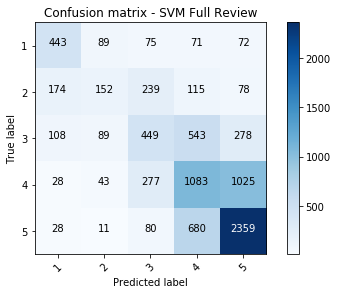

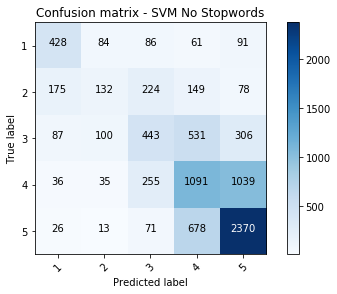

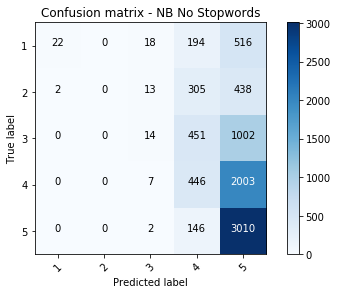

In [39]:
import itertools

c1 = confusion_matrix(svmy1,svmp1)
c2 = confusion_matrix(svmy2,svmp2)
c3 = confusion_matrix(nby2,nbp2)
class_names = ['1', '2', '3', '4', '5']
plt.figure()
plot_confusion_matrix(c1, classes=class_names,normalize=False,title='Confusion matrix - SVM Full Review')
plt.figure()
plot_confusion_matrix(c2, classes=class_names,normalize=False,title='Confusion matrix - SVM No Stopwords')
plt.figure()
plot_confusion_matrix(c3, classes=class_names,normalize=False,title='Confusion matrix - NB No Stopwords')

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

hotel_review_data['reviewsrating'] = hotel_review_data['reviewsrating']
hotel_review_data['reviewsrating'].value_counts()

5    12671
4     9880
3     5747
1     3070
2     2988
Name: reviewsrating, dtype: int64

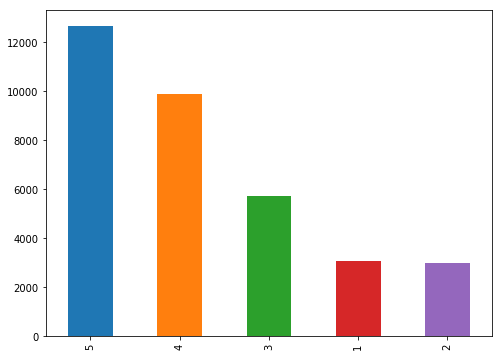

In [41]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
hotel_review_data['reviewsrating'].value_counts().plot.bar(ylim=0)
plt.show()

In [42]:
reviewsrating_1 = hotel_review_data[hotel_review_data["reviewsrating"]==1]
reviewsrating_2 = hotel_review_data[hotel_review_data["reviewsrating"]==2]
reviewsrating_3 = hotel_review_data[hotel_review_data["reviewsrating"]==3]
reviewsrating_4 = hotel_review_data[hotel_review_data["reviewsrating"]==4]
reviewsrating_5 = hotel_review_data[hotel_review_data["reviewsrating"]==5]


subset_of_reviewsrating_1 = reviewsrating_1.sample(n=3000)
subset_of_reviewsrating_2 = reviewsrating_2.sample(n=2000)
subset_of_reviewsrating_3 = reviewsrating_3.sample(n=4000)
subset_of_reviewsrating_4 = reviewsrating_4.sample(n=5000)
subset_of_reviewsrating_5 = reviewsrating_5.sample(n=7000)

data_clean1 = pd.concat([subset_of_reviewsrating_1,subset_of_reviewsrating_2,subset_of_reviewsrating_3,subset_of_reviewsrating_4,subset_of_reviewsrating_5])
data_clean1 = data_clean1.sample(frac=1).reset_index(drop=True)
print("Current shape of dataset :",data_clean1.shape)

Current shape of dataset : (21000, 23)


In [43]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

x = data_clean1.reviewstext
y = data_clean1.reviewsrating
count_vect = CountVectorizer()
x_train1, x_test1, y_train1, y_test1 = train_test_split(x, y, test_size=0.20, random_state = 10)
X_train_counts = count_vect.fit_transform(x_train1)


tfidf_transformer = TfidfTransformer()
tf_transformer = TfidfTransformer(use_idf=False).fit(X_train_counts)
X_train_tf = tf_transformer.transform(X_train_counts)

X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
clf = MultinomialNB().fit(X_train_tfidf, y_train1)

X_test_counts = count_vect.transform(x_test1)
tfidf_transformer = TfidfTransformer()
tf_transformer = TfidfTransformer(use_idf=False).fit(X_test_counts)
X_test_tf = tf_transformer.transform(X_test_counts)



pred = clf.predict(X_test_tf)
print("Multinomial Naive Bayes:",accuracy_score(y_test1, pred))


classif = SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42,max_iter=5, tol=None)
clf1 = classif.fit(X_train_tfidf, y_train1)

pred = clf1.predict(X_test_tf)
print("SGD:",accuracy_score(y_test1, pred))


clf2 = DecisionTreeClassifier(random_state=0)
clf3 = clf2.fit(X_train_tfidf, y_train1)
pred = clf3.predict(X_test_tf)
print("Decision Tree:",accuracy_score(y_test1, pred))

clf4 = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0)
clf5 = clf4.fit(X_train_tfidf, y_train1)
pred = clf5.predict(X_test_tf)
print("Random Forest:",accuracy_score(y_test1, pred))

from sklearn.pipeline import Pipeline
text_clf = Pipeline([('vect', CountVectorizer()),
                    ('tfidf', TfidfTransformer()),
                    ('clf-svm', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, n_iter=5, random_state=42))])
text_clf = text_clf.fit(x_train1, y_train1)

predicted = text_clf.predict(x_test1)
np.mean(predicted == y_test1)

Multinomial Naive Bayes: 0.385476190476
SGD: 0.472142857143
Decision Tree: 0.360714285714
Random Forest: 0.340238095238


C:\Users\vijay\AppData\Local\conda\conda\envs\my_root\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning:

n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.



0.49904761904761907

In [52]:
data_clean_rating15 = pd.concat([subset_of_reviewsrating_1,subset_of_reviewsrating_5])
data_clean_rating15 = data_clean_rating15.sample(frac=1).reset_index(drop=True)
print("Current shape of dataset :",data_clean_rating15.shape)


y = data_clean_rating15.reviewsrating
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#Setting up the X and Y data, where X is the review text and Y is the rating
#Three different inputs will be used: original review text, cleaned review text, and only adjectives review text

x1 = data_clean_rating15.reviewstext
x2 = data_clean_rating15.cleanrev
x3 = data_clean_rating15.adjreview

x3.head()
#Creating a vectorizer to split the text into unigrams and bigrams
vect = TfidfVectorizer(ngram_range = (1,2))
x_vect1 = vect.fit_transform(x1)
x_vect2 = vect.fit_transform(x2)
x_vect3 = vect.fit_transform(x3)

#Making some simple functions for linear svc, knn, and naive bayes
def linsvc(x,y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state = 10)
    classf = LinearSVC()
    classf.fit(x_train, y_train)
  #  pred1 = classf.predict(x_train)
   # print("Linear SVC: Training Set",accuracy_score(y_train, pred1))
    pred = classf.predict(x_test)
    print("Linear SVC:",accuracy_score(y_test, pred))
    return(y_test, pred)

def revknn(x,y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state = 10)
    classf = KNeighborsClassifier(n_neighbors=3)
    classf.fit(x_train, y_train)
    pred = classf.predict(x_test)
    print("kNN:",accuracy_score(y_test, pred))
    return(y_test, pred)

def revnb(x,y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state = 10)
    classf = MultinomialNB()
    classf.fit(x_train, y_train)
    pred = classf.predict(x_test)
    print("Naive Bayes:",accuracy_score(y_test, pred))
    return(y_test, pred)

Current shape of dataset : (10000, 23)


In [53]:
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB

svmy1,svmp1 = linsvc(x_vect1,y)
svmy2,svmp2 = linsvc(x_vect2,y)
svmy3,svmp3 = linsvc(x_vect3,y)

knny1,knnp1 = revknn(x_vect1,y)
knny2,knnp2 = revknn(x_vect2,y)
knny3,knnp3 = revknn(x_vect3,y)

nby1,nbp1 = revnb(x_vect1,y)
nby2,nbp2 = revnb(x_vect2,y)
nby3,nbp3 = revnb(x_vect3,y)

Linear SVC: 0.93
Linear SVC: 0.929
Linear SVC: 0.878
kNN: 0.7176
kNN: 0.718
kNN: 0.7364
Naive Bayes: 0.8228
Naive Bayes: 0.8436
Naive Bayes: 0.8396


In [54]:
print(clf.predict(count_vect.transform(["A great Hotel and perfect for a traveler who has a early morning flight. Being a Hilton Honors member helps! I had a reduced rate in a lovely suite. No fuss check in and check out, immaculate rooms ! I will stay there again. Nice pool and fitness center"])))

[5]


In [55]:
print(clf.predict(count_vect.transform(["2 people checking in a long line Was bad and the sink in the room had a bad odor coming from the plumbing"])))

[1]


In [56]:
print(clf.predict(count_vect.transform(["This hotel was nice and a great value for the money. The free breakfast in the morning was basic but I loved the waffles. The staff was friendly and the location was clean. They only got four stars because it was not the nicest hotel but I would definitely stay a night again if I need a place for 1night"])))

[5]


In [57]:
print(clf.predict(count_vect.transform(["Bed bugs, will not be back"])))

[1]
